In [26]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import itertools

In [12]:
x = np.arange(-500, 500, 10)
y = np.arange(0, 400, 10)
z = np.arange(-500, 500, 10)

xx, yy, zz = np.meshgrid(x, y, z)

# x,z are horizontal plane
# y is depth

In [15]:
xx[xx.shape[0]//2][xx.shape[1]//2]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [68]:
# calculates distance from every grid point to every hydrophone location
dx_h3 = np.sqrt(xx**2 + (yy-170)**2 + zz**2)
dx_h4 = np.sqrt(xx**2 + (yy-240)**2 + zz**2)
dx_h5 = np.sqrt(xx**2 + (yy-310)**2 + zz**2)
dx_h6 = np.sqrt(xx**2 + (yy-380)**2 + zz**2)

# set velocity model to be the same everywhere
vp = np.zeros_like(xx) + 6000

# calculate perfect travel times to each hydrophone
t_h3 = dx_h3/vp
t_h4 = dx_h4/vp
t_h5 = dx_h5/vp
t_h6 = dx_h6/vp

# calculate arrival time deltas for each hydrophone pair
theoretical_pairs = [i for i in itertools.combinations([t_h3, t_h4, t_h5, t_h6], r=2)]
hpairs = [('h3', 'h4'), ('h3', 'h5'), ('h3', 'h6'), ('h4', 'h5'), ('h4', 'h6'), ('h5', 'h6')]
time_deltas = [h2-h1 for h1, h2 in theoretical_pairs]
time_deltas = dict(zip(hpairs, time_deltas))

In [69]:

# event data

hydrophones = ['h3', 'h4', 'h5', 'h6']
true_arrivals = [0.137-0.086, 0.086-0.086, 0.111-0.086, 0.153-0.086]
hydrophone_combinations = [i for i in itertools.combinations(hydrophones, r=2)]
hydrophone_combination_arrival_times = [i[1] - i[0] for i in itertools.combinations(true_arrivals, r=2)]
# print(hydrophone_combinations)
# print(hydrophone_combination_arrival_times)
event_deltas = dict(zip(hydrophone_combinations, hydrophone_combination_arrival_times))
event_deltas

{('h3', 'h4'): -0.05100000000000002,
 ('h3', 'h5'): -0.02600000000000001,
 ('h3', 'h6'): 0.015999999999999986,
 ('h4', 'h5'): 0.02500000000000001,
 ('h4', 'h6'): 0.067,
 ('h5', 'h6'): 0.041999999999999996}

In [127]:
dt = []
dt_rms = []
for pair in hpairs:
    time_delta = time_deltas[pair]
    event_delta = event_deltas[pair]
    dt.append(event_delta - time_delta)
    dt_rms.append(np.sqrt(event_delta**2 - time_delta**2))
    
dt = dict(zip(hpairs, dt))
dt_rms = dict(zip(hpairs, dt_rms))

/tmp/ipykernel_30903/1686875958.py:7: RuntimeWarning: invalid value encountered in sqrt
  dt_rms.append(np.sqrt(event_delta**2 - time_delta**2))


In [128]:
dt[('h3','h4')].min()

-0.06266666666666669

In [129]:
dt[('h3', 'h4')].shape

(40, 100, 100)

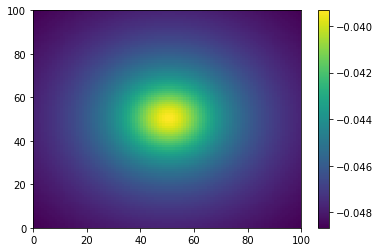

In [131]:
plt.pcolormesh(dt[('h3', 'h4')][35])
plt.colorbar()

In [137]:
hpairs

[('h3', 'h4'),
 ('h3', 'h5'),
 ('h3', 'h6'),
 ('h4', 'h5'),
 ('h4', 'h6'),
 ('h5', 'h6')]

/tmp/ipykernel_30903/3281001108.py:4: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  cbar = ax.pcolormesh(x, -y, dt_rms[('h5', 'h6')][:,50,:], cmap='Purples_r')


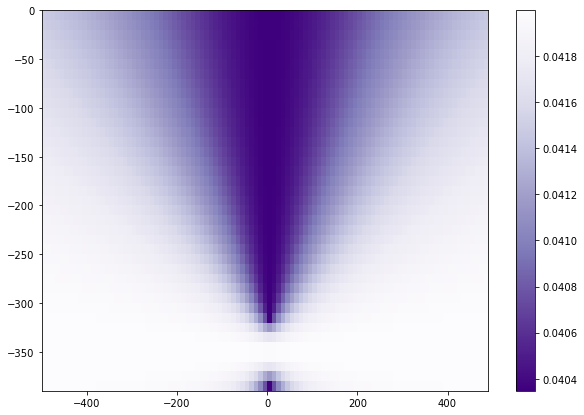

In [147]:
fig, ax = plt.subplots(figsize=(10, 7))

# ax[0].pcolormesh(x, y, dt[('h3', 'h4')][:,50,:], cmap='PRGn')
cbar = ax.pcolormesh(x, -y, dt_rms[('h5', 'h6')][:,50,:], cmap='Purples_r')
fig.colorbar(cbar)

In [149]:
DT_RMS = np.zeros_like(dt_rms[('h3', 'h4')])

for pair in hpairs:
    DT_RMS += dt_rms[pair]

/tmp/ipykernel_30903/1308326383.py:4: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  cbar = ax.pcolormesh(x, -y, DT_RMS[:,50,:], cmap='Purples_r')


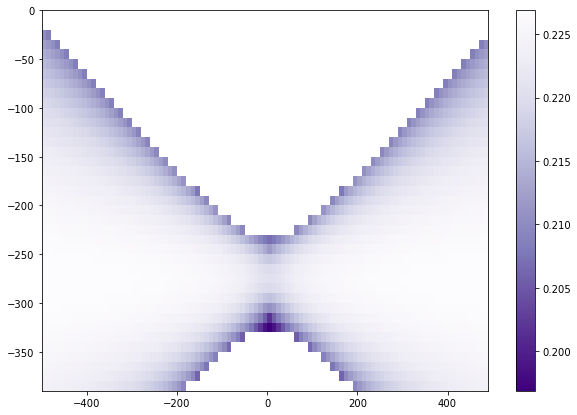

In [150]:
fig, ax = plt.subplots(figsize=(10, 7))

# ax[0].pcolormesh(x, y, dt[('h3', 'h4')][:,50,:], cmap='PRGn')
cbar = ax.pcolormesh(x, -y, DT_RMS[:,50,:], cmap='Purples_r')
fig.colorbar(cbar)

In [19]:
'h6', 0.153
'h5', 0.111
'h4', first 0.086
'h3', 0.137
'starttme', '2019-05-21T08:05:17.933000Z'

In [36]:
# reset the data

hydrophones = ['h3', 'h4', 'h5', 'h6']
true_arrivals = [0.137-0.086, 0.086-0.086, 0.111-0.086, 0.153-0.086]
hydrophone_depths = [30, 100, 170, 240, 310, 380]

In [42]:
hydrophone_combinations = [i for i in itertools.combinations(hydrophones, r=2)]
hydrophone_combination_arrival_times = [i[1] - i[0] for i in itertools.combinations(true_arrivals, r=2)]
print(hydrophone_combinations)
print(true_arrivals)
print(hydrophone_combination_arrival_times)

[('h3', 'h4'), ('h3', 'h5'), ('h3', 'h6'), ('h4', 'h5'), ('h4', 'h6'), ('h5', 'h6')]
[0.05100000000000002, 0.0, 0.02500000000000001, 0.067]
[-0.05100000000000002, -0.02600000000000001, 0.015999999999999986, 0.02500000000000001, 0.067, 0.041999999999999996]


In [25]:
h3 h4
h3 h5
h3 h6
h4 h5
h4 h6
h5 h6

24

[(0.05100000000000002, 0.0),
 (0.05100000000000002, 0.02500000000000001),
 (0.05100000000000002, 0.067),
 (0.0, 0.02500000000000001),
 (0.0, 0.067),
 (0.02500000000000001, 0.067)]